In [1]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [3]:
train_dataset = datasets.ImageFolder(root='./data/train/', transform=data_transform)

In [4]:
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

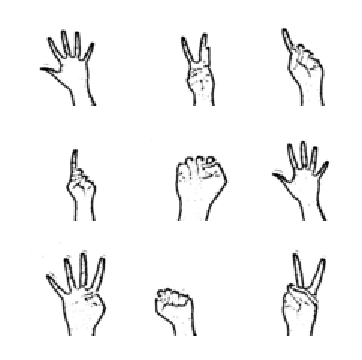

In [8]:
%matplotlib inline
first_batch, _ = next(iter(dataset_loader))  # retrieve the first batch
fig = plt.figure(figsize=(12, 6))
for row in range(1, 4):  # show 3 rows
    for col in range(1, 4):  # show 3 columns
        index = 6 * (row - 1) + col
        image = first_batch[index - 1, 0, :]  # retrieve images as (28, 28) tensors
        fig.add_subplot(3, 6, index)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
plt.show()

In [30]:
from torchsummary import summary
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [36]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator,self).__init__()
        self.DCV1 = nn.ConvTranspose2d(in_channels=100, out_channels=512, kernel_size=4, stride=1, padding=0)
        self.BN1  = nn.BatchNorm2d(1024)
        self.DCV2 = nn.ConvTranspose2d(512, 256, 4, 2, 1)
        self.BN2  = nn.BatchNorm2d(512)
        self.DCV3 = nn.ConvTranspose2d(256, 128, 4, 2, 1)
        self.BN3  = nn.BatchNorm2d(256)
        self.DCV4 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.BN4  = nn.BatchNorm2d(128)
        self.DCV5 = nn.ConvTranspose2d(64, 3, 4, 2, 1)
        
    def forward(self, inputs):
        '''
        input size: (batch_size, 100, 1, 1)
        outputs size: (batch_size, 1, 64, 64)
        ''' 
        ori=inputs[0][0].data.numpy()
        print ('original : ',ori.shape)
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Deconv 1
        x = self.DCV1(inputs)
        x = self.BN1(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Deconv 2
        x = self.DCV2(x)
        x = self.BN2(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Deconv 3
        x = self.DCV3(x)
        x = self.BN3(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Deconv 4
        x = self.DCV4(x)
        x = self.BN4(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Deconv 5 + output
        x = self.DCV5(x)
        outputs = F.tanh(x)
        return outputs

In [38]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator,self).__init__()
        self.CV1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1)
        self.CV2 = nn.Conv2d(64, 128, 4, 2, 1)
        self.BN2 = nn.BatchNorm2d(num_features=128)
        self.CV3 = nn.Conv2d(128, 256, 4, 2, 1)
        self.BN3 = nn.BatchNorm2d(256)
        self.CV4 = nn.Conv2d(256, 512, 4, 2, 1)
        self.BN4 = nn.BatchNorm2d(512)
        self.CV5 = nn.Conv2d(512, 1, 4)

    def forward(self, inputs):
        '''
        input size: (batch_size, 3, 64, 64)
        outputs size: (batch_size, 1)
        '''
        ori=inputs[0][0].data.numpy()
        print ('original : ',ori.shape)
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Conv 1
        x = self.CV1(inputs)
        x = F.leaky_relu(x, negative_slope=0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Conv 2
        x = self.CV2(x)
        x = self.BN2(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Conv 3
        x = self.CV3(x)
        x = self.BN3(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Conv 4
        x = self.CV4(x)
        x = self.BN4(x)
        x = F.leaky_relu(x, 0.2)
        intm=x[0][0].data.numpy()
        print ('conv 2: ',intm.shape)
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        # Conv 5 + output
        x = self.CV5(x)
        outputs = F.sigmoid(x) # at this point outputs has size (batch_size, 1, 1, 1) need to resize!
        outputs = outputs.view(-1, 1)  # resize to (batch_size, 1)
        return outputs

In [33]:
# def model
G = Generator()#.cuda()
D = Discriminator()#.cuda()

# def Adam optimizer
G_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)
D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

# loss
criterion = nn.BCELoss()

('original : ', (64, 64))


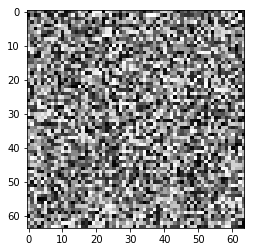

('conv 2: ', (32, 32))


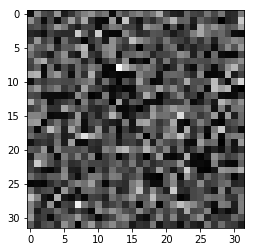

('conv 2: ', (16, 16))


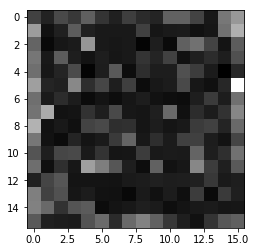

('conv 2: ', (8, 8))


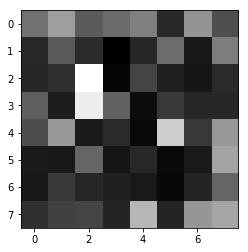

('conv 2: ', (4, 4))


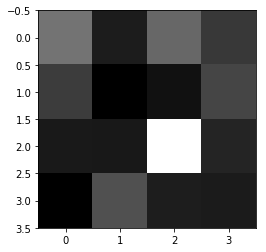

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1       [-1, 128L, 32L, 32L]            6272
            Conv2d-2       [-1, 256L, 16L, 16L]          524544
       BatchNorm2d-3       [-1, 256L, 16L, 16L]             512
            Conv2d-4         [-1, 512L, 8L, 8L]         2097664
       BatchNorm2d-5         [-1, 512L, 8L, 8L]            1024
            Conv2d-6        [-1, 1024L, 4L, 4L]         8389632
       BatchNorm2d-7        [-1, 1024L, 4L, 4L]            2048
            Conv2d-8           [-1, 1L, 1L, 1L]           16385
Total params: 11038081
Trainable params: 11038081
Non-trainable params: 0
----------------------------------------------------------------
None


In [40]:
print(summary(D, (3, 64, 64)))

('original : ', (64, 64))


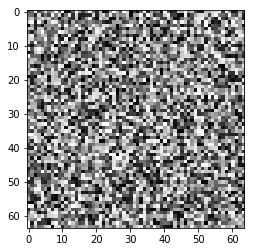

('conv 2: ', (67, 67))


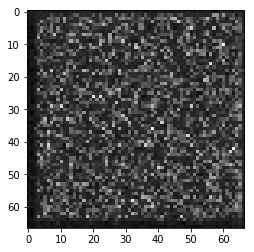

('conv 2: ', (134, 134))


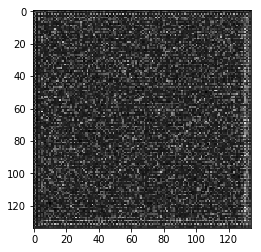

('conv 2: ', (268, 268))


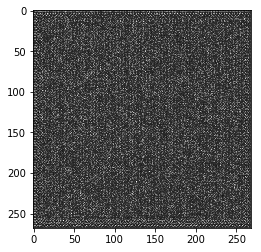

('conv 2: ', (536, 536))


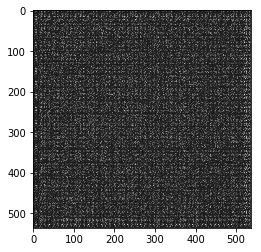

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1      [-1, 1024L, 67L, 67L]         1639424
       BatchNorm2d-2      [-1, 1024L, 67L, 67L]            2048
   ConvTranspose2d-3     [-1, 512L, 134L, 134L]         8389120
       BatchNorm2d-4     [-1, 512L, 134L, 134L]            1024
   ConvTranspose2d-5     [-1, 256L, 268L, 268L]         2097408
       BatchNorm2d-6     [-1, 256L, 268L, 268L]             512
   ConvTranspose2d-7     [-1, 128L, 536L, 536L]          524416
       BatchNorm2d-8     [-1, 128L, 536L, 536L]             256
   ConvTranspose2d-9     [-1, 1L, 1072L, 1072L]            2049
Total params: 12656257
Trainable params: 12656257
Non-trainable params: 0
----------------------------------------------------------------
None


In [39]:
print(summary(G, (100, 64, 64)))

In [45]:
batch_size = 4
# label tensors to compute BCE loss
real_labels = Variable(torch.ones(batch_size, 1))
fake_labels = Variable(torch.zeros(batch_size, 1))
print real_labels, fake_labels

Variable containing:
 1
 1
 1
 1
[torch.FloatTensor of size 4x1]
 Variable containing:
 0
 0
 0
 0
[torch.FloatTensor of size 4x1]



In [49]:
def train_D(real_images):
    # sample real images from dataset, wrap in Variable
    real_images = Variable(real_images)

    # sample fake images from generator
    noise = Variable(torch.randn(batch_size, 100, 1, 1))
    fake_images = G.forward(noise)

    # forward prop
    real_outputs = D.forward(real_images)
    fake_outputs = D.forward(fake_images)

    # D optimizer grad
    D_optimizer.zero_grad()

    # loss formula , backprop and update params
    D_loss = criterion(real_outputs, real_labels) + criterion(fake_outputs, fake_labels)
    # backprop
    D_loss.backward()
    # update params
    D_optimizer.step()
    
    return D_loss.data[0]  # return the loss of this minibatch

In [48]:
def train_G():
    # sample fake images
    noise = Variable(torch.randn(batch_size, 100, 1, 1))
    fake_images = G.forward(noise)

    # foward prop
    fake_outputs = D.forward(fake_images)

    # G optimizer grad
    G_optimizer.zero_grad()
            
    # loss formaula
    G_loss = criterion(fake_outputs, real_labels)
    # backprop  
    G_loss.backward()
    # update params
    G_optimizer.step()
    
    return G_loss.data[0]

In [53]:
# use to evaluate model: see how fake images improve over the epochs
def plot_fake_images(rows, cols):
    # generate (rows * cols) fake images
    noise = Variable(torch.randn(rows * cols, 100, 1, 1))
    fake_images = G.forward(noise)
    
    fig = plt.figure(figsize=(2 * cols, 2 * rows))
    for row in range(1, rows + 1):
        for col in range(1, cols + 1):
            index = cols * (row - 1) + col
            image = fake_images[index - 1, 0, :, :]  # get images as dim tensors

            fig.add_subplot(rows, cols, index)
            plt.imshow(image.data, cmap='gray')
            plt.axis('off')
        
    plt.show()
    return

In [54]:
def train(epoch_max, batch_size):
    # logger recording the average batch loss per each epoch
    G_log = []
    D_log = []
    
    for epoch in range(epoch_max):
        # logger recording the losses for each minibatch in this epoch
        G_batch_loss = []
        D_batch_loss = []
        
        for batch, (real_images, _) in enumerate(dataset_loader):  # enumerate through minibatches
            # train discriminator
            D_loss = train_D(real_images)
            
            # train generator
            G_loss = train_G()
        
            # add batch losses to logger
            D_batch_loss.append(D_loss)
            G_batch_loss.append(G_loss)
            
        # compute average loss of this epoch
        G_log.append(sum(G_batch_loss) / len(G_batch_loss))
        D_log.append(sum(D_batch_loss) / len(D_batch_loss))
        
        # for selected epochs, show 5 generated images
        #epoch_list = [0, 1, 2, 4, 7, 12, 19]
        #if epoch in epoch_list:
        print('Epoch %d, G_loss: %.3f, D_loss = %.3f' % \
              (epoch , G_log[epoch], D_log[epoch]))
        plot_fake_images(1, 6)

    return G_log, D_log

In [ ]:
# record time used
from time import time
start_time = time()
G_log, D_log = train(epoch_max, batch_size)
elapsed_time = time() - start_time
print('Total time used: %d seconds' % elapsed_time)

In [ ]:
def plot_learning_curve(G_log, D_log):
    plt.figure(figsize=(10, 6))
    plt.plot(G_log, color='green',  linewidth=2.5, linestyle='-', label='G loss')
    plt.plot(D_log, color='yellow', linewidth=2.5, linestyle='-', label='D loss')
    plt.legend(loc='upper right',frameon=True)
    return

In [ ]:
plot_learning_curve(G_log, D_log)
plot_fake_images(4, 6)